# Third quantization

## Single Fermion

Primero que todos, definimos nuestro hamiltoniano (H) y la matríz M que parametriza los operadores de Lindblad de la siguiente manera:

$$ H= -ihw_1w_2 + cte$$
$$ L_1=\sqrt\Gamma_1 c$$
$$ L_2=\sqrt\Gamma_2 c^{\dagger}$$

In [1]:
import sympy as sp
import numpy as np

gamma_mas= sp.Symbol("\Gamma_+", real=True)
gamma_menos= sp.Symbol("\Gamma_-", real=True)
h= sp.Symbol("h", real=True)

M11= gamma_mas/4
M12= -1j*gamma_menos/4
M21= 1j*gamma_menos/4
M22= gamma_mas/4

#Construimos M
M= sp.Matrix([[M11,M12],[M21,M22]])

#Construimos Hamiltoniano
H11= 0
H12= -1j*h/2
H21= 1j*h/2
H22= 0

H= sp.Matrix([[H11,H12],[H21,H22]])

In [2]:
H

Matrix([
[      0, -0.5*I*h],
[0.5*I*h,        0]])

In [3]:
M

Matrix([
[     \Gamma_+/4, -0.25*I*\Gamma_-],
[0.25*I*\Gamma_-,       \Gamma_+/4]])

### Espectro de autovalores

Una vez definido el hamiltoniano y la matríz M, debemos crear la matríz de estructura A, además podemos obtener $X$, la cual al diagonalizarla, nos entregará las rapidities ($\beta_j$)


$$ A= \begin{bmatrix}
-2iH + 2iM_i & 2iM \\
-2iM^T & -2iH-2iM_i 
\end{bmatrix}  $$

$$X = -2iH+2M_r$$

In [4]:
#Definimos función que para un H y M dados, nos devuelve las rapidities.
def rapidities(H,M):
    Mr= (M + M.conjugate())/2
    X= -2j*H + 2*Mr
    eigenvects= sp.Matrix(X).eigenvects()
    #Guardamos rapidities
    rapidities=[]
    for j in range(len(X[:,0])):
        rapidities.append(eigenvects[j][0])
    return rapidities
betas=rapidities(H,M)

In [5]:
betas[0]

0.5*\Gamma_+ - I*h

In [6]:
betas[1]

0.5*\Gamma_+ + I*h

Vemos entonces que se las rapidities del problema son:
$$\beta_{1,2} = \frac{\Gamma_+}{2} \pm ih $$
Además vemos que se cumple que: 
$$0 \leqslant Re(\beta_1) \leqslant Re(\beta_2)$$

Veamos ahora que llegamos a las mismas rapidities, obteniendo los autovalores de la matríz de estructura A.

In [7]:
from sympy import (MatrixSymbol, BlockMatrix, symbols,
    Identity, ZeroMatrix, block_collapse)

#Primero que todo, vamos a definir una función que nos entregue el espectro de autovalores para un H y M dados
def spectrum(H,M):
    #Construction of the structure matrix
    Mr= (M + M.conjugate())/2
    Mi= (M - M.conjugate())/(2j)
    A= BlockMatrix([[-2j*H+2j*Mi,2j*M],[-2j*M.transpose(),-2j*H-2j*Mi]])
    ##eigenvalues and eigenvectors
    A_matrix= sp.Matrix(A)
    eigenvalues= A_matrix.eigenvals()
    eigenvects= A_matrix.eigenvects()
    
    rapidities=[]
    for j in range(len(H)):
        rapidities.append(eigenvects[j][0])
    
    return rapidities
rapidities_A=spectrum(H,M)

In [8]:
Mr= (M + M.conjugate())/2
Mi= (M - M.conjugate())/(2j)

In [9]:
rapidities_A[0]    ### -beta1

-0.5*\Gamma_+ - I*h

In [10]:
rapidities_A[1]    ### -beta2

-0.5*\Gamma_+ + I*h

In [11]:
rapidities_A[2]    ### beta2

0.5*\Gamma_+ - I*h

In [12]:
rapidities_A[3]    ### beta1

0.5*\Gamma_+ + I*h

De este modo, vemos que los métodos son análogos, pues se obtienen las mismas rapidities. (Acá nos entregan $-\beta$ tambien, por eso tenemos 4 autovalores).

Ahora, vamos a ordenar las rapidities, y luego obtendremos los autovalores asociados.

In [13]:
#definimos función para extraer la parte real
def real(z):
    return (z+z.conjugate())/2
reales=[]
for j in range(len(betas)):
    reales.append(real(betas[j]))

In [14]:
from sympy.abc import x
from sympy.utilities.lambdify import implemented_function
from sympy import lambdify
f=lambdify(gamma_mas,reales,'numpy')
real_list=f(1)   #Evaluemos gamma_mas en 1
indices_ordenados = sorted(range(len(real_list)), key=lambda i: real_list[i])  #Nos devuelve el indice de los betas ordenados
betas_sort=sp.zeros(1,len(betas))
for i in range(len(reales)):
    betas_sort[0,i]=betas[indices_ordenados[i]]

Una vez que ya hemos ordenado los betas, podemos construir los valores propios con:

$$ \lambda_\nu = -2\sum^{2n}_{j=1}\beta_j\nu_j$$

Donde $\nu_j \in {0,1}$ y $j \in {1,2,......,2n}$. Dada esta construcción de los valores propios, vamos a representar cada valor propio por un número en binario. 

Ejemplo:   0110 = -2($\beta_2$+$\beta_3$)

In [15]:
from itertools import product

#Asi obtenemos los autovalores como
autovalores=sp.zeros(1,2*len(betas))

#Creamos combinaciones binarias
combinaciones=list(product([0,1],repeat=len(betas)))


for i in range(len(combinaciones)):
    comb_actual=combinaciones[i]
    autoval=0
    for k in range(len(comb_actual)):
        autoval+= comb_actual[k]*betas[k]
        
    autovalores[0,i]=-2*autoval
    

In [16]:
from sympy import symbols, Eq, pprint
print('Los autovalores son:')
autovalores

Los autovalores son:


Matrix([[0, -1.0*\Gamma_+ - 2*I*h, -1.0*\Gamma_+ + 2*I*h, -2.0*\Gamma_+]])

In [153]:
x1

69

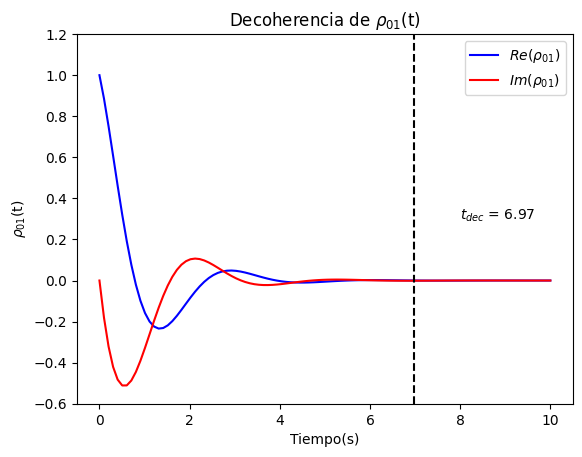

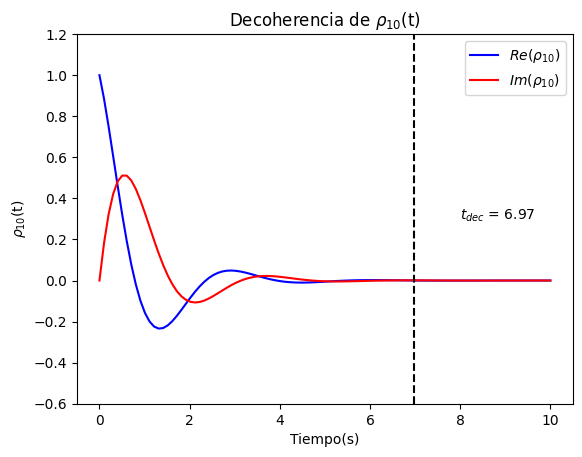

In [167]:
#Podemos mostrar las decoherencias haciendo el plot
tiempo=np.linspace(0,10,100)
amplitud=1
gamma_plus=1
h_np=1
lambda1=-1*gamma_plus-2j*h_np
lambda2=-1*gamma_plus+2j*h_np
decoherence01=amplitud*np.exp(lambda1*tiempo)
decoherence10=amplitud*np.exp(lambda2*tiempo)
absolutos=abs(decoherence01)
absolutos2=abs(decoherence10)
x1=0
x2=0
for j in range(len(absolutos)):
    if absolutos[j] < 1e-3:
        x1= j
        break
for j in range(len(absolutos2)):
    if absolutos[j] < 1e-3:
        x2= j
        break

plt.plot(tiempo,decoherence01.real,'b')
plt.plot(tiempo,decoherence01.imag,'r')
plt.legend([r'$Re(\rho_{01})$',r'$Im(\rho_{01})$'])
plt.title(r'Decoherencia de $\rho_{01}$(t)' )
plt.xlabel('Tiempo(s)')
plt.ylabel(r'$\rho_{01}$(t)')
plt.axvline(x=tiempo[x1], color='black', linestyle='--', label='Línea Vertical en x=2')
plt.text(8,0.3,r'$t_{dec}$ = ' +str(round(tiempo[x1],2)))
plt.ylim(-0.6,1.2)
plt.savefig('rho01' , dpi=300, bbox_inches='tight')

plt.show()

plt.plot(tiempo,decoherence10.real,'b')
plt.plot(tiempo,decoherence10.imag,'r')
plt.legend([r'$Re(\rho_{10})$',r'$Im(\rho_{10})$'])
plt.title(r'Decoherencia de $\rho_{10}$(t)' )
plt.xlabel('Tiempo(s)')
plt.ylabel(r'$\rho_{10}$(t)')
plt.text(8,0.3,r'$t_{dec}$ = ' +str(round(tiempo[x2],2)))
# Agregar una línea vertical en x=2
plt.axvline(x=tiempo[x2], color='black', linestyle='--', label='Línea Vertical en x=2')
plt.ylim(-0.6,1.2)

plt.savefig('rho10' , dpi=300, bbox_inches='tight')
plt.show()

De esta forma, hemos obtenido exitosamente los autovalores del caso de un solo fermión.

### Observables físicos

Para obtener observables físicos, debemos obtener la matríz de correlación $C_{j,k} := tr( w_jw_k\rho_{NESS})$, usando lo obtenido por Prosen en el 2010, se tiene que:

$$ C_{j,k} = \delta_{j,k} + 4iZ_{j,k}$$ 

Donde Z es la solución de la ecuación de Liapunov:

$$ X^{T}Z + ZX = M_i$$

In [17]:
import numpy as np
from scipy import linalg
from sympy.abc import x
from sympy.utilities.lambdify import implemented_function
from sympy import lambdify
Mi= (M - M.conjugate())/(2j)
Mr= (M + M.conjugate())/2
X= -2j*H + 2*Mr
H_lamb=lambdify(h,H,'numpy')
Mi_lamb=lambdify(gamma_menos,Mi,'numpy')
Mr_lamb=lambdify(gamma_mas,Mr,'numpy')
#Evaluamos Mi y X
X_lamb=lambdify([gamma_mas,h],X,'numpy')
gamas=11
gamenos=12
h_magg=4

Z= linalg.solve_continuous_lyapunov(X_lamb(gamas,h_magg).T,Mi_lamb(gamenos))

In [18]:
#Funciones utilizadas para comparar con lo obtenido
def liapunov(g_mas,g_menos,h_mag):
    liapunov1= np.matmul(X_lamb(g_mas,h_mag),Z) + np.matmul(Z,(X_lamb(g_mas,h_mag).T)) 
    return liapunov1

def liapunov2(g_mas,g_menos,h_mag):
    liapunov2= np.matmul((X_lamb(g_mas,h_mag).T),Z) + np.matmul(Z,X_lamb(g_mas,h_mag)) 
    return liapunov2

print('Mi es:')
print('------------------------')
print(Mi_lamb(gamenos))
print('------------------------')
print(liapunov(gamas,gamenos,h_magg))
print('------------------------')
print(liapunov2(gamas,gamenos,h_magg))

Mi es:
------------------------
[[ 0. -3.]
 [ 3.  0.]]
------------------------
[[-2.22044605e-16 -3.00000000e+00]
 [ 3.00000000e+00  6.66133815e-16]]
------------------------
[[ 2.22044605e-16 -3.00000000e+00]
 [ 3.00000000e+00  2.22044605e-16]]


Vemos entonces que efectivamente el solver utilizado, resuelve correctamente la ecuacion continua de liapunov. Teniendo Z, procedemos a construir la matríz de correlacion  $C_{j,k} := tr( w_jw_k\rho_{NESS})$

In [19]:
#construimos matríz con sympy
Z_sp=sp.Matrix(Z)
C= sp.eye(len(betas)) + 4j*Z_sp
C

Matrix([
[                 1,        -1.09090909090909*I],
[1.09090909090909*I, 1 + 1.11022302462516e-16*I]])

Obtengamos de acá el número de ocupación promedio $<c^{\dagger}c>$

$$ <c^{\dagger}c> = \frac{1}{2} - \frac{i}{2}<w_1w_2> $$

In [21]:
w1w2= C[1,0]

num_ocup= 0.5 - 0.5*1j*w1w2

num_ocup

1.04545454545455

Veamos si cumplen lo de Prosen(2008).

In [22]:
def num_prom(g_mas,g_menos):
    gama2=(g_mas+g_menos)/2
    gama1=(g_mas-g_menos)/2
    razon= gama2/(gama1+gama2)
    return razon

def num_prosen(g_mas,g_menos,h_magg):
    Z= linalg.solve_continuous_lyapunov(X_lamb(g_mas,h_magg).T,Mi_lamb(g_menos))
    Z_sp=sp.Matrix(Z)
    C= sp.eye(len(betas)) + 4j*Z_sp
    w1w2= C[1,0]
    num_ocup= 0.5 - 0.5*1j*w1w2
    return np.array(num_ocup,dtype=float)

def promedio(g_mas,g_menos):
    g=(g_mas+g_menos)/g_mas
    return 0.5*g


In [168]:
def num_prom(gama1,gama2):
    #gama2=(g_mas+g_menos)/2
    #gama1=(g_mas-g_menos)/2
    razon= gama2/(gama1+gama2)
    return razon

def num_prosen(gama1,gama2,h_magg):
    g_mas=gama2+gama1
    g_menos=gama2-gama1
    Z= linalg.solve_continuous_lyapunov(X_lamb(g_mas,h_magg).T,Mi_lamb(g_menos))
    Z_sp=sp.Matrix(Z)
    C= sp.eye(len(betas)) + 4j*Z_sp
    w1w2= C[1,0]
    num_ocup= 0.5 - 0.5*1j*w1w2
    return np.array(num_ocup,dtype=float)

In [ ]:
plot(x, y, color='green', marker='o', linestyle='dashed',
...      linewidth=2, markersize=12)

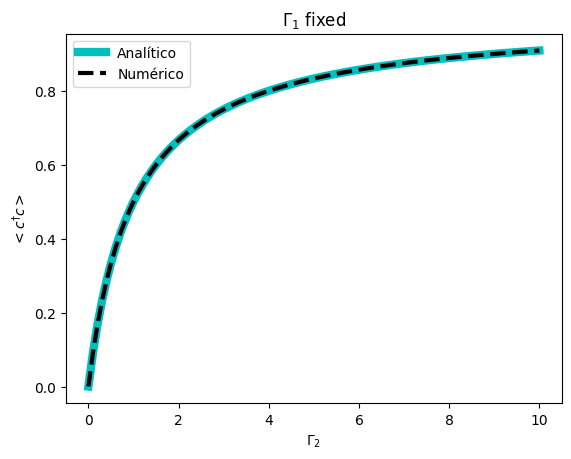

In [173]:
#Fijaremos gama1
gama1=1
h_magg=1
gama2_array=np.linspace(0,10,100)

num_prom_array=num_prom(gama1,gama2_array)
num_prosen_array=np.zeros(len(gama2_array))

for n in range(len(gama2_array)):
    num_prosen_array[n]=num_prosen(gama1,gama2_array[n],h_magg)
    
import matplotlib.pyplot as plt
plt.plot(gama2_array,num_prom_array,'c',linewidth=6)
plt.plot(gama2_array,num_prosen_array,'black',linestyle='dashed',linewidth=3)
plt.xlabel('$\Gamma_2$')
plt.ylabel('$<c^{\dagger}c>$')
plt.legend(['Analítico','Numérico'])
plt.title('$\Gamma_1$ fixed')
#plt.grid()
plt.savefig('analitico vs numerico gama+' , dpi=300, bbox_inches='tight')
plt.show()

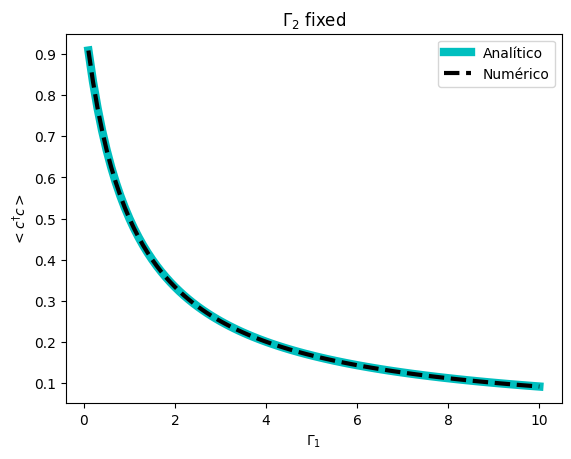

In [174]:
#Fijaremos g_menos
gama2=1
h_magg=1
gama1_array=np.linspace(0.1,10,100)

num_prom_array=num_prom(gama1_array,gama2)
num_prosen_array=np.zeros(len(gama1_array))

for n in range(len(gama1_array)):
    num_prosen_array[n]=num_prosen(gama1_array[n],gama2,h_magg)
    
import matplotlib.pyplot as plt
plt.plot(gama1_array,num_prom_array,'c',linewidth=6)
plt.plot(gama1_array,num_prosen_array,'black',linestyle='dashed',linewidth=3)
plt.xlabel('$\Gamma_1$')
plt.ylabel('$<c^{\dagger}c>$')
plt.legend(['Analítico','Numérico'])
plt.title('$\Gamma_2$ fixed')
#plt.grid()
plt.savefig('analitico vs numerico gama-' , dpi=300, bbox_inches='tight')
plt.show()

Con esto, se observa que efectivamente el resultado obtenido por medio de la matriz de correlación numéricamente, coincide con lo esperado analíticamente.